<p align="center">
  <a title="tdene.github.io/synth_opt_adders" href="https://tdene.github.io/synth_opt_adders"><img src="https://img.shields.io/website?longCache=true&style=flat-square&label=tdene.github.io%2Fsynth_opt_adders&logo=GitHub&logoColor=fff&up_color=blueviolet&up_message=Read%20now%20%E2%9E%9A&url=https%3A%2F%2Ftdene.github.io%2Fsynth_opt_adders%2Findex.html"></a><!--
  -->
  <a title="Apache-2.0" href="https://github.com/tdene/synth_opt_adders/blob/main/LICENSE"><img src="https://img.shields.io/github/license/tdene/synth_opt_adders?longCache=true&style=flat-square&logo=Apache&label=Code"></a><!--
  -->
  <a title="'unit_tests' workflow Status"
     href="https://github.com/VUnit/vunit/actions?query=workflow%3Aunit_tests"
  ><img alt="'unit_tests' workflow Status" src="https://img.shields.io/github/workflow/status/tdene/synth_opt_adders/Python%20package/main?longCache=true&style=flat-square&label=unit_tests&logo=GitHub%20Actions&logoColor=fff"
  /></a><!--
  -->
  <a title="'doc workflow Status"
     href="https://github.com/VUnit/vunit/actions?query=workflow%3Adocs"
  ><img alt="'doc workflow Status" src="https://img.shields.io/github/workflow/status/tdene/synth_opt_adders/doc/main?longCache=true&style=flat-square&label=doc&logo=GitHub%20Actions&logoColor=fff"
  /></a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tdene/synth_opt_adders/blob/master/doc/notebooks/intro.ipynb)

For detailed documentation, please click the "Read now" button above.

# Hardware synthesis of arithmetic operations

Arithmetic operations are important. Addition, in particular, is ubiquitous. When a RISC-V processor boots into Linux, for example, roughly 70% of the assembly instructions use addition.

Circuit design involves trade-offs, typically phrased in terms of power vs performance (speed) vs area.<br>
These trade-offs certainly apply to arithmetic operations. Circuits can be very fast and power-hungry, very slow and power-efficient, or anywhere in between.

Moreso, these trade-offs occur on a bit-by-bit basis. If a circuit generates a 64-bit result, each bit of the result can be optimized for power, speed, or area.<br>
Often this becomes essential, as some bits must be processed faster than others.

These trade-offs create a Pareto front of possible circuits, each optimal for a specific situation.<br>
The implementation of such arithmetic circuits is non-trivial, as is the design space, for reasons elaborated upon in the main documentation.

## Setup (RUN ME before executing any code in this section)

In [2]:
!pip install --upgrade git+https://github.com/tdene/synth_opt_adders.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-y5iolic5
  Running command git clone --filter=blob:none --quiet https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-y5iolic5
  Resolved https://github.com/tdene/synth_opt_adders.git to commit a4234668310ef61ae48e5467f5e8e5bf0046e592
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Traditional framework

How can these circuits be generated and explored, especially when it comes to arithmetic operations?<br>
Historically, one particular method for hardware addition has been used and researched since the 1980s.<br>
This method conceptualizes circuits using the type of diagram shown below, and is implemented by version v0.4.5 of this library.

<img src="https://github.com/tdene/synth_opt_adders/blob/main/doc/diagrams/sklansky_old.png" width="400"/>

The diagram above displays a binary expression graph that performs the desired computation.<br>
The lines in the diagram are edges in the graph, carrying data from the top to the bottom. Each ■ represents a node that performs a simple computation.

This type of diagram, and of implementation, can best be described as an **n**-rooted binary tree that is drawn upside-down.<br>
There are many ways to design such circuits, and the design space can be explored as seen below.

<img src="https://github.com/tdene/synth_opt_adders/blob/main/doc/diagrams/adder_transforms.gif?raw=true" width="400"/>

Such an exploration is performed by identifying the following three simple patterns throughout the graph, and performing point-targeted transforms.

<img src="https://github.com/tdene/synth_opt_adders/blob/main/doc/diagrams/L.png?raw=true" width="150"/>

<img src="https://github.com/tdene/synth_opt_adders/blob/main/doc/diagrams/T.png?raw=true" width="150"/>

<img src="https://github.com/tdene/synth_opt_adders/blob/main/doc/diagrams/F.png?raw=true" width="150"/>

This method is computationally expensive, requiring exponential run-time.

Moreover, any such exploration using classic diagrams and conceptualization is incomplete and overly complicated.<br>
It is unclear how large the design space, and it is impossible to represent all valid designs.<br>
Under this framework, simple structures become obfuscated, while more advanced optimizations become impossible to implement or theoretically describe.

Arithmetic computation architectures are not **n**-rooted binary trees.

## Revised framework

Instead, this library chooses to express arithmetic computation in terms of forests of **n** trees.

This approach results directly from the underlying mathematics, allowing circuit designers to leverage decades of research in graph theory and toplogy.

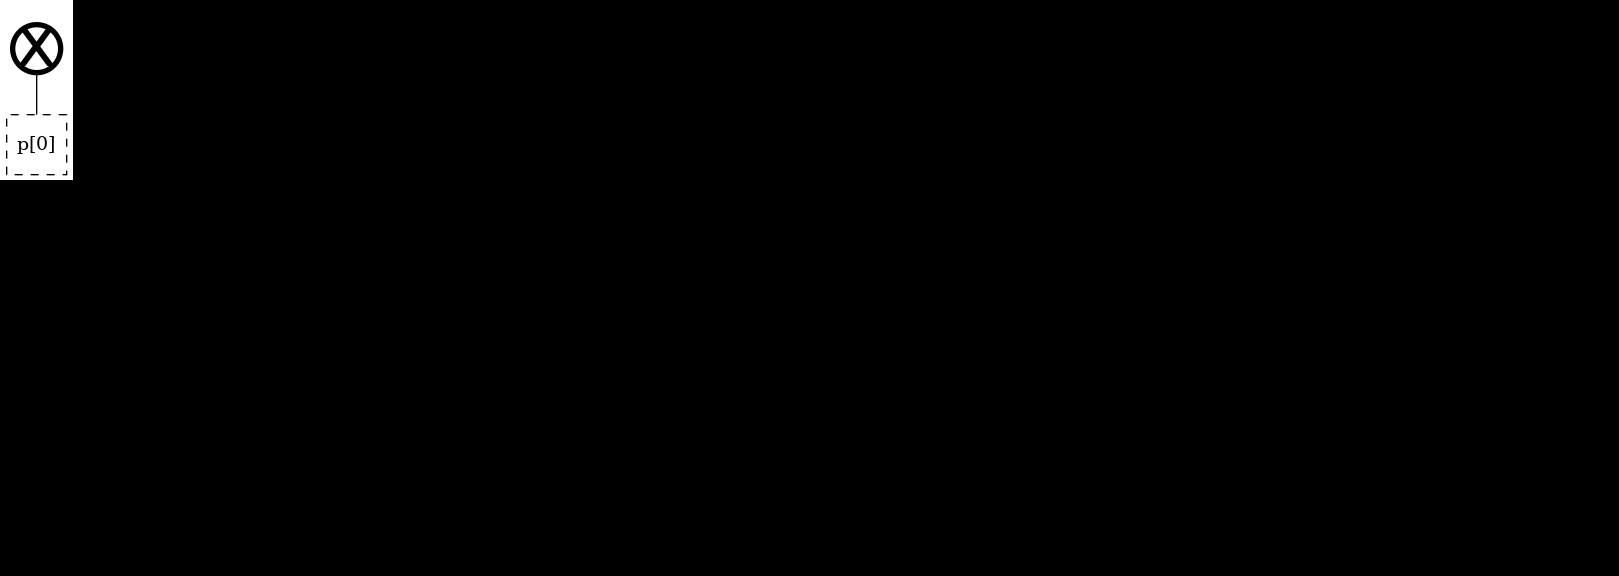

In [3]:
from pptrees.AdderForest import AdderForest as forest

width = 17
f = forest(width, alias = "sklansky")
f

The diagram above displays the same circuit as the one from the previous section.

Each frame of the animation computes an individual bit of the final sum.

It is immediately clear how large the design space is:

In [9]:
from pptrees.util import catalan

width = 17
number_of_designs = 1
for a in range(width):
  number_of_designs = number_of_designs * catalan(a)
print(number_of_designs)

323828772071827218688291208408423952910530531102720000000


It is straightforward to generate any valid tree in O(n lg(n)) time:

The maximum tree sizes for a forest of width 17 are [0, 0, 1, 4, 13, 41, 131, 428, 1429, 4861, 16795, 58785, 208011, 742899, 2674439, 9694844, 35357669]


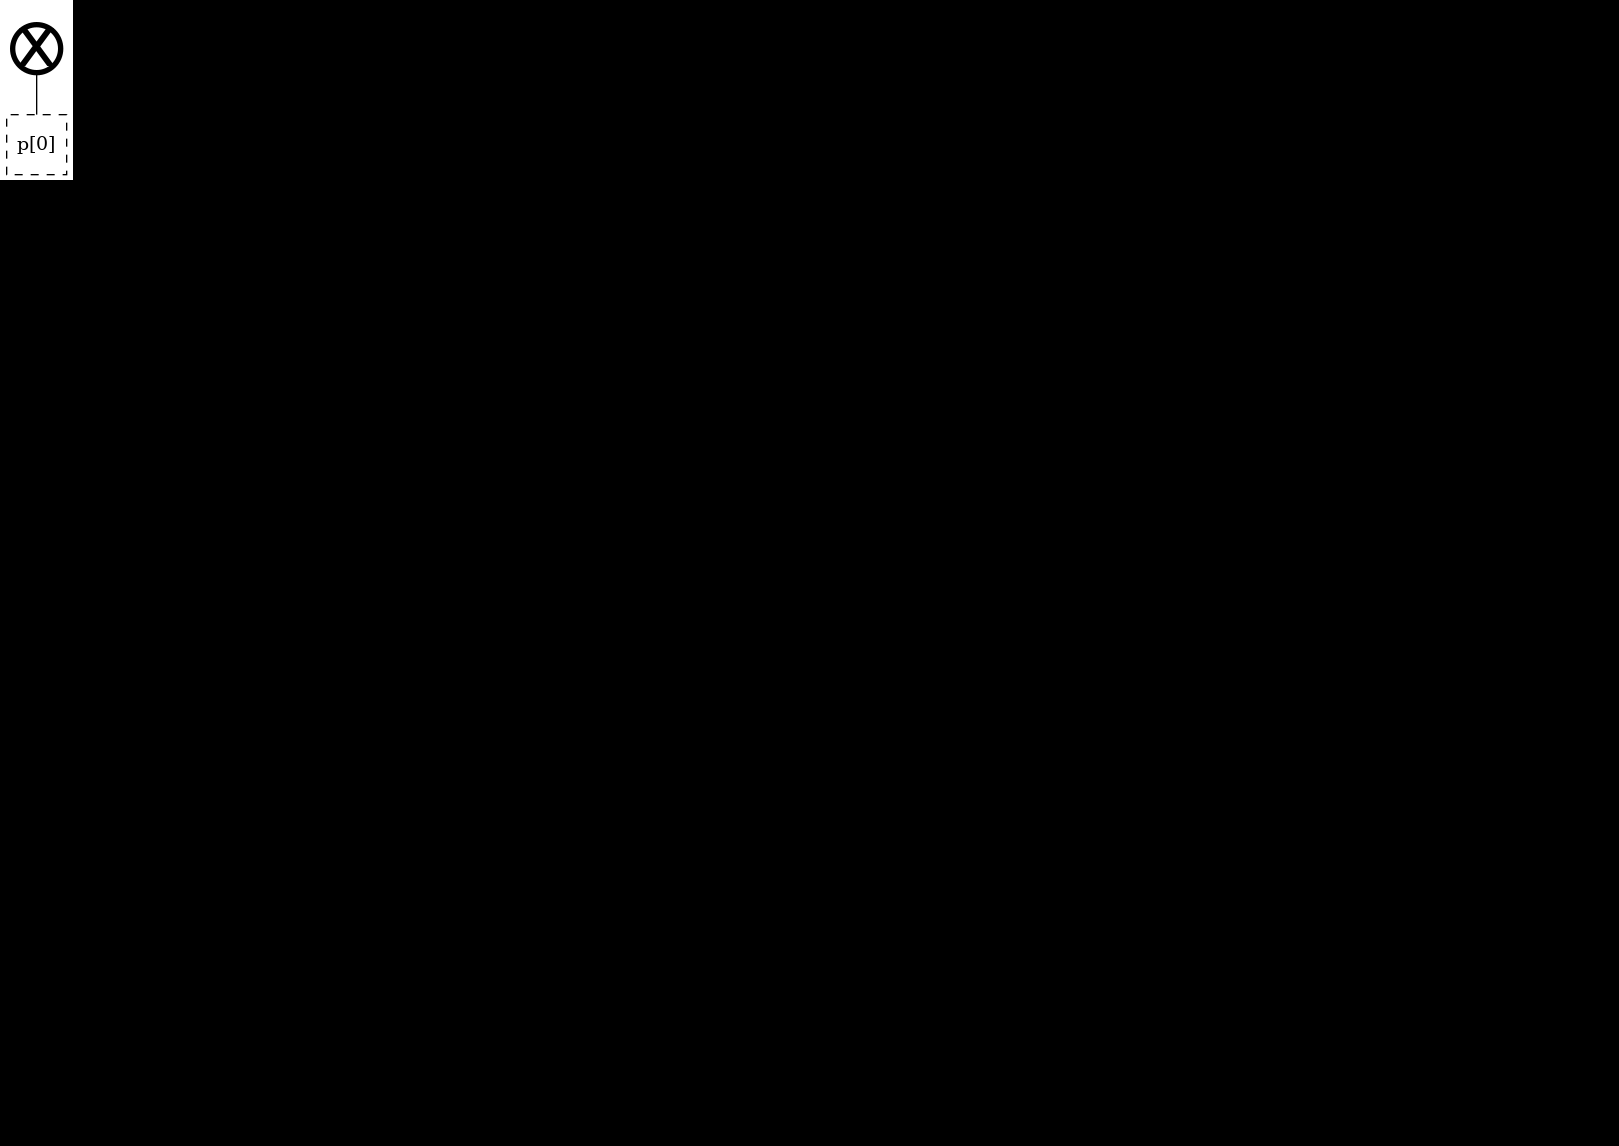

In [28]:
from pptrees.AdderForest import AdderForest as forest
from pptrees.util import catalan_bounds

width = 17
print("The maximum tree sizes for a forest of width {0} are {1}".format(width,catalan_bounds(width)))
f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214, 670, 2000, 5463, 12351, 135151, 461614, 1512512, 8351854, 3541563])
f

Similarly, it is straightforward to label any valid tree in O(n lg(n)) time:

In [30]:
from pptrees.AdderForest import AdderForest as forest

f = forest(width, tree_start_points = [0, 0, 0, 2, 5, 37, 74, 214, 214, 670, 2000, 5463, 12351, 135151, 461614, 1512512, 8351854, 3541563])
for t in enumerate(f.trees):
    print("The rank of tree {0} in this forest is {1}".format(t[0],t[1].rank()))

The rank of tree 0 in this forest is 0
The rank of tree 1 in this forest is 0
The rank of tree 2 in this forest is 0
The rank of tree 3 in this forest is 2
The rank of tree 4 in this forest is 5
The rank of tree 5 in this forest is 37
The rank of tree 6 in this forest is 74
The rank of tree 7 in this forest is 214
The rank of tree 8 in this forest is 214
The rank of tree 9 in this forest is 670
The rank of tree 10 in this forest is 2000
The rank of tree 11 in this forest is 5463
The rank of tree 12 in this forest is 12351
The rank of tree 13 in this forest is 135151
The rank of tree 14 in this forest is 461614
The rank of tree 15 in this forest is 1512512
The rank of tree 16 in this forest is 8351854


Factorization optimizations such that of Ling, a concept that cannot be described by the olforestd framework, are a straightforward decomposition of the "gp" pre-processing nodes into "g" and "p", followed by a stereoscopic combination of two such tree halves.

Sparseness, another concept that is difficult to understand under the old framework, arises naturally.

Nested sparseness, a novel concept that can reduce the circuits' logical depth, has not been discovered by prior literature due to its incompatibility with the traditional framework.

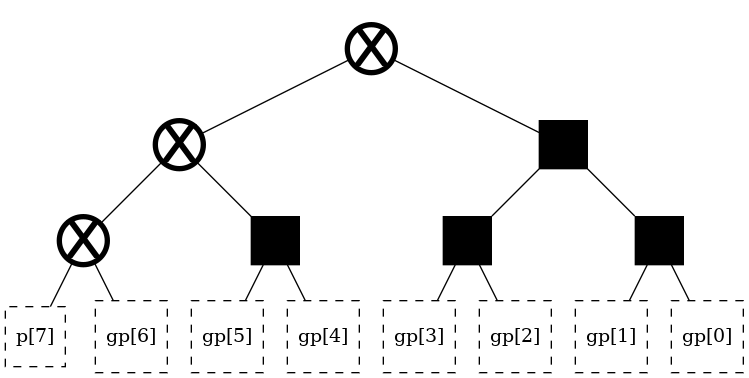

In [31]:
from pptrees.AdderTree import AdderTree as tree

width = 8
t = tree(width, start_point = 214)
t

This framework allows for a full and efficient exploration of the entire design space.

In addition, these concepts don't just apply to binary addition. They apply to a wide range of hardware operations.

### Credits

In [ ]:
print("Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb")

Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb


### Install conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


### Install dependencies

In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a=1.0.290
  - magic
  - openroad
  - netgen
  - yosys
  - gdstk
  - pip:
    - pyyaml
    - click
    - pandas

Overwriting environment.yml


In [ ]:
!conda env update --prefix /usr/local --file environment.yml
!apt-get update && apt-get install -yq tcllib
!test -f klayout_0.27.8-1_amd64.deb || curl -O https://www.klayout.org/downloads/Ubuntu-18/klayout_0.27.8-1_amd64.deb
!dpkg -i klayout_0.27.8-1_amd64.deb; apt-get update && apt-get -f -yq install

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda


Installing pip dependencies: | Ran pip subprocess with arguments:
['/usr/local/bin/python', '-m', 'pip', 'install', '-U', '-r', '/content/condaenv.jvbny14s.requirements.txt']
Pip subprocess output:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

done
#
# To activate this environment, use
#
#     $ conda activate /usr/local
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.c

### Clone OpenLane



In [ ]:
!git clone --depth=1 https://github.com/tdene/OpenLane.git

fatal: destination path 'OpenLane' already exists and is not an empty directory.


### Install pptrees library

In [ ]:
!pip install git+https://github.com/tdene/synth_opt_adders.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-12sna3a2
  Running command git clone --filter=blob:none --quiet https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-12sna3a2
  Resolved https://github.com/tdene/synth_opt_adders.git to commit 12aa5ea8443ee47c0cd22d419af79ac7388fdd11
  Preparing metadata (setup.py) ... done


### Set various OpenLane environment variables

In [ ]:
import os
PATH=os.environ['PATH']
%env PDK_ROOT=/usr/local/share/pdk
%env OPENLANE_ROOT=/content/OpenLane
%env PATH={PATH}:/content/OpenLane:/content/OpenLane/scripts
%env TCLLIBPATH=/usr/share/tcltk
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/usr/local/share/pdk
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts
env: TCLLIBPATH=/usr/share/tcltk
env: OPENLANE_LOCAL_INSTALL=1


### Clone a repository that allows for easy parsing of implementation results

In [ ]:
!git clone https://github.com/tdene/adder_networks.git
!pip install -r adder_networks/requirements.txt

Cloning into 'adder_networks'...
remote: Enumerating objects: 4268, done.
remote: Counting objects: 100% (4268/4268), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 4268 (delta 3561), reused 4104 (delta 3401), pack-reused 0
Receiving objects: 100% (4268/4268), 4.27 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (3561/3561), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 13.

### Create OpenLane config file for our design

In [ ]:
%%writefile config.tcl
# Basic flow switches to make the flow run smoothly (and fast)
set ::env(IO_PCT) 0
set ::env(DESIGN_IS_CORE) 0
set ::env(DECAP_CELL) sky130_fd_sc_hd__fill_*
## Disable some slow steps for the sake of runtime
set ::env(DIODE_INSERTION_STRATEGY) 0
set ::env(RUN_LVS) 0
set ::env(RUN_MAGIC_DRC) 0
set ::env(RUN_KLAYOUT_DRC) 0
## Our design has no clock
set ::env(CLOCK_TREE_SYNTH) 0
## Adder blocks have lots of pins, but they can sit on the lower metals
set ::env(FP_IO_HLAYER) {met1 met3}
set ::env(FP_IO_VLAYER) {li1 met2}
## Since fan-out is a post-production step, synthesis can take care of it
set ::env(SYNTH_MAX_FANOUT) 4

# These are the actual design-specific flow switches
## Set target clock
set ::env(CLOCK_PERIOD) 1.0
## Set floorplan area and density target
set ::env(CELL_PAD) 0
set ::env(PL_TARGET_DENSITY) 0.90
set ::env(FP_CORE_UTIL) 50

## This corresponds to the optimize = 0 or 1 flag in hdl(); the default option
set ::env(SYNTH_NO_FLAT) 0

## This corresponds to hdl(mapping = "default"); the default option
set ::env(SYNTH_READ_BLACKBOX_LIB) 0

## This corresponds to the optimize = 2 flag in hdl()
###set ::env(SYNTH_NO_FLAT) 1

## This corresponds to hdl(mapping = "sky130_fd_sc_hd") or some other library
###set ::env(SYNTH_READ_BLACKBOX_LIB) 1

Overwriting config.tcl


### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/adder1
!flow.tcl -design adder1 -init_design_config -src "adder1.v"
!cp config.tcl OpenLane/designs/adder1/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/adder1/src
[INFO]: Populating /content/OpenLane/designs/adder1/config.tcl..
[INFO]: Copying adder1.v to adder1.v
[INFO]: Finished populating:
/content/OpenLane/designs/adder1/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/adder1/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design adder1 -override_env RUN_CVC=0,QUIT_ON_MISMATCHES=0

OpenLane b7b14af49adeec0dfed97229c153b1dee81131dc
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/adder1/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/adder1/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/adder1/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/adder1/runs/RUN_2022.05.25_22.30.33
[INFO]: Preparing LEF files for the nom corner...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call last):
  File "/conten

### Visualize the final layout

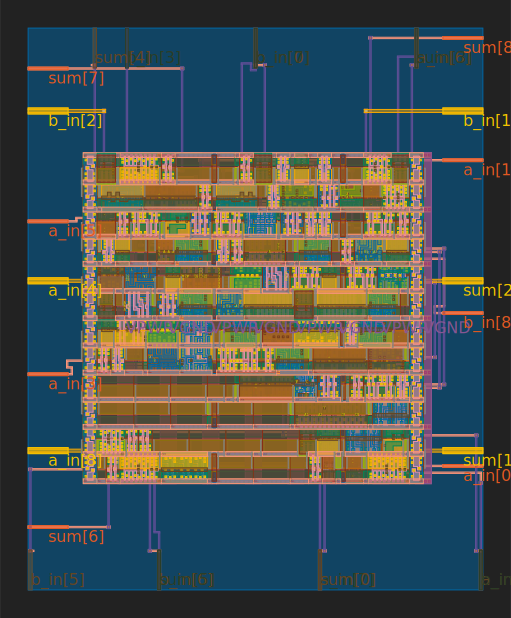

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/adder1/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('adder1.svg')
SVG('adder1.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/adder1
!cp -r OpenLane/designs/adder1/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/adder1/

### View results

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "adder1" --target_density="40%"

Width (# of bits);Adder architecture;Target density;Std Cell count;Worst path delay;Maximum frequency;Area;Power;Energy;Achieved density;Worst path delay;Maximum frequency;Area;Power;Energy
32;Sklansky;40%;258;2.28 ns;439 MHz;3,373 µm²;2,190 µW;4,993 fJ;76%;1.90 ns;526 MHz;1,836 µm²;1,230 µW;2,337 fJ

